# Import Libs

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Import Dataset

In [102]:
df = pd.read_csv("<DATSET_FILE_PATH>")

# Dataset Analysis

In [103]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [104]:
# Dropping Null Values
df.dropna(inplace=True)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


### Checking Categorical Features

In [106]:
for col in df.select_dtypes('object'):
  print(f"{col}'s Unique Value: ")
  print(df[f"{col}"].value_counts())
  print("*" * 30 + "\n")

Gender's Unique Value: 
Male      3671
Female    3013
Other       14
Name: Gender, dtype: int64
******************************

Education Level's Unique Value: 
Bachelor's Degree    2265
Master's Degree      1572
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: Education Level, dtype: int64
******************************

Job Title's Unique Value: 
Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Software Project Manager        1
Name: Job Title, Length: 191, dtype: int64
******************************



## Resolving Inconsistencies

In [107]:
# Resolve Education Level Inconsistency
df['Education Level'].value_counts()

Bachelor's Degree    2265
Master's Degree      1572
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: Education Level, dtype: int64

In [108]:
def solve_education_level(s):
  for i in ['Bachelor', 'Master', 'PhD']:
    if i.lower() in s.lower() :
      return i
  return s

df['Education Level'] = df['Education Level'].apply(solve_education_level)

# Let's check .value_counts again to be sure about method's functionality
df['Education Level'].value_counts()

Bachelor       3021
Master         1860
PhD            1369
High School     448
Name: Education Level, dtype: int64

## Check Duplicates

In [109]:
df.duplicated().sum()

4912

In [110]:
df.pivot_table(index=['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary'],
               aggfunc='size').sort_values().to_frame()

0
Age  Gender Education Level Job Title                      Years of Experience Salary      
43.0 Female Bachelor        Content Marketing Manager      12.0                120000.0   1
36.0 Male   Master          Product Manager                10.0                160000.0   1
31.0 Female Bachelor        Junior Marketing Coordinator   3.0                 50000.0    1
                            Junior Sales Representative    3.0                 40000.0    1
                            Junior Social Media Specialist 3.0                 45000.0    1
...                                                                                      ..
33.0 Female Master          Product Manager                11.0                198000.0  38
32.0 Male   Bachelor        Software Engineer              8.0                 190000.0  39
27.0 Male   Bachelor        Software Engineer              3.0                 80000.0   45
24.0 Female High School     Receptionist                   0.0                 25000.0   45
32.0 Male   Bachelor        Product Manager                7.0                 120000.0  45

[1786 rows x 1 columns]

# Data Analysis

## Distributions

In [111]:
def histplot(df, col):
  plt.figure(figsize=(8, 5))
  plt.hist(df[col], bins='auto', color='cyan', density=True, label=col)
  plt.xlabel(f"{col}", fontsize=12)
  plt.ylabel("Frequncy", fontsize=12)
  plt.show()

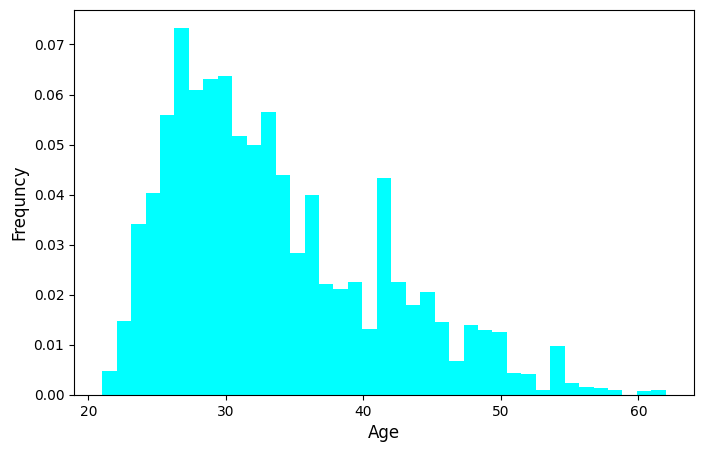

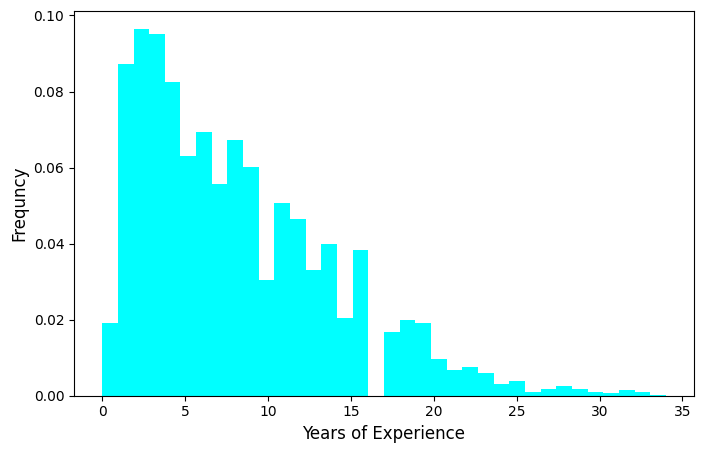

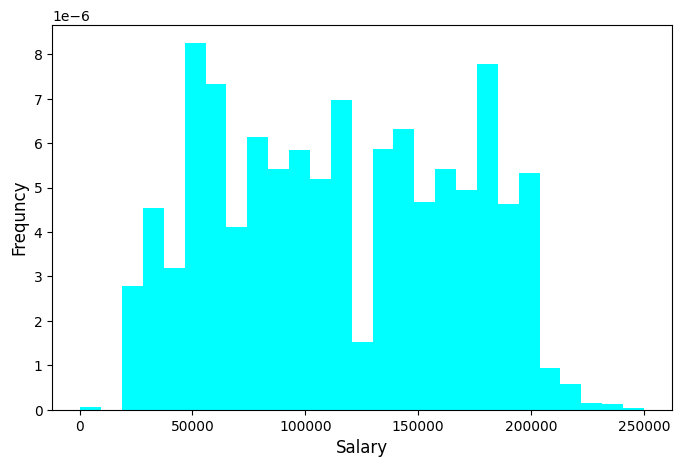

In [112]:
for feature in ['Age', 'Years of Experience', 'Salary']:
  histplot(df, feature)

## `Age` & `Years of Experience` has effect on `Salary` ?



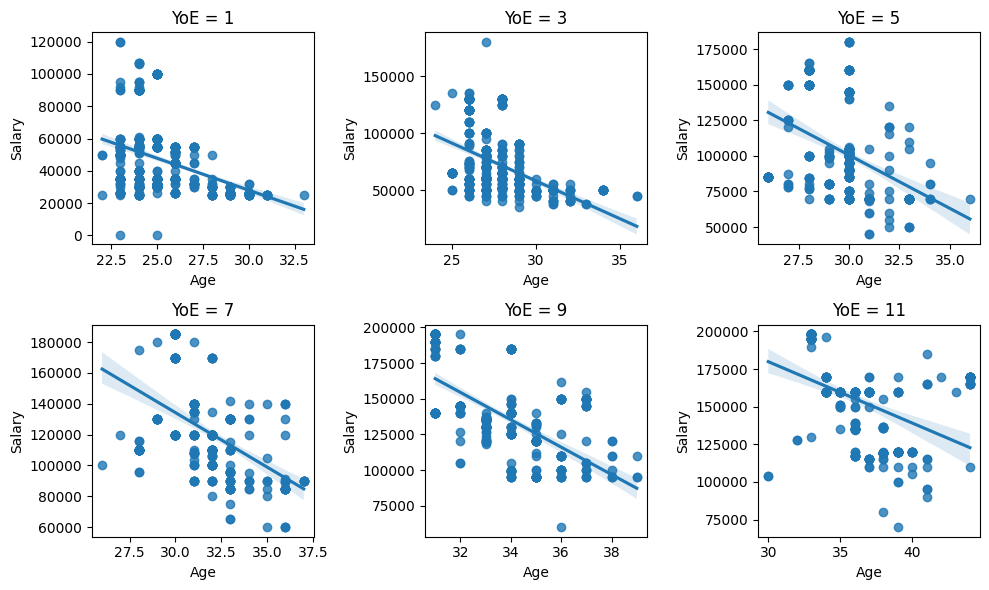

In [113]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
xfactor = "Age"

for i, yoe in enumerate([1, 3, 5, 7, 9, 11]):
    g = sns.regplot(x=xfactor, y="Salary", ax=axes[i//3, i%3], data=df[df['Years of Experience']==yoe])
    g.set(title=f'YoE = {yoe}')

plt.tight_layout()

## Most Popular Jobs

0
Job Title               Salary      
Data Scientist          140000.0  86
                        180000.0  67
Data Analyst            100000.0  60
Software Engineer       160000.0  58
Full Stack Engineer     115000.0  58
Receptionist            25000.0   57
Software Engineer       140000.0  56
Senior Project Engineer 185000.0  55
Product Manager         120000.0  55
Marketing Manager       130000.0  54

<ipython-input-114-2df3ce4ec5e2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Job Title' ,x='Salary', data=popular_jobs,  palette='Set1')


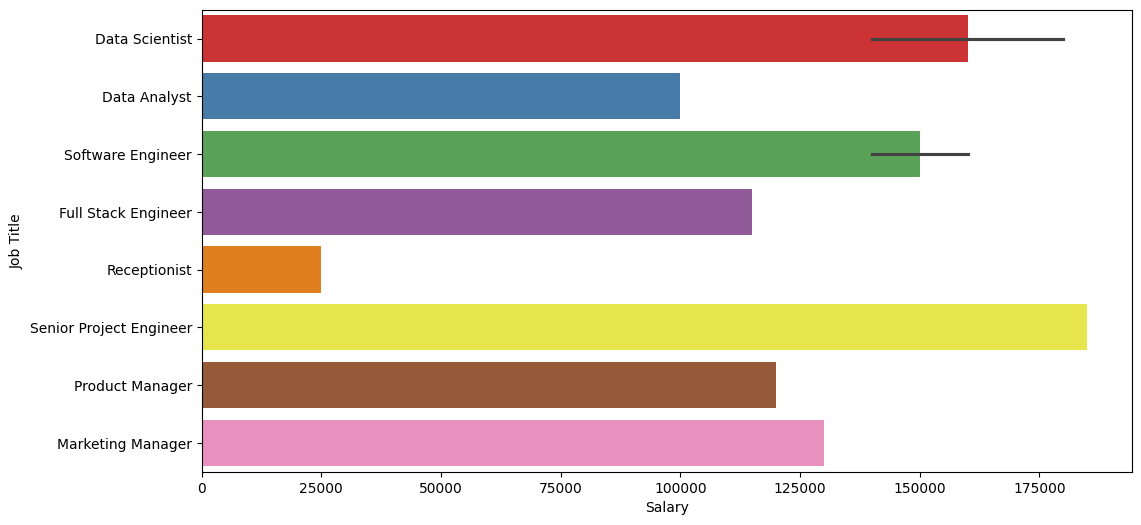

In [114]:
popular_jobs = df[['Job Title', 'Salary']].value_counts().nlargest(10).to_frame()
display(popular_jobs)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(y='Job Title' ,x='Salary', data=popular_jobs,  palette='Set1')
plt.show()

## Top Salaries Based On Education Level

0
Education Level Salary       
Bachelor        55000.0   213
                60000.0   198
                80000.0   164
PhD             185000.0  164
Bachelor        70000.0   160
                65000.0   159
Master          120000.0  158
Bachelor        90000.0   146
PhD             170000.0  144
Bachelor        50000.0   136

<ipython-input-115-f4776eab8287>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Salary' ,x='Education Level', data=popular_jobs,  palette='Set1')


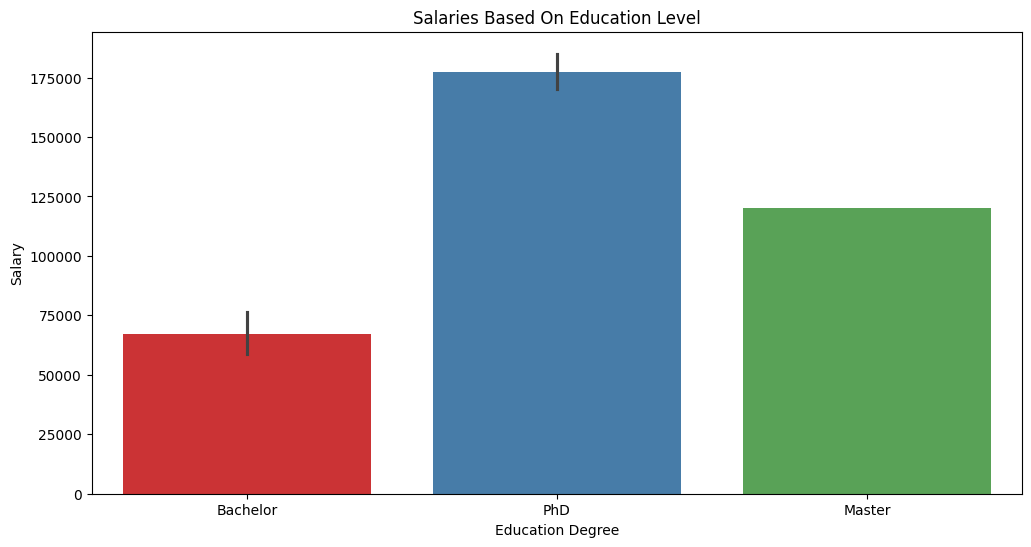

In [115]:
popular_jobs = df[['Education Level', 'Salary']].value_counts().nlargest(10).to_frame()
display(popular_jobs)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(y='Salary' ,x='Education Level', data=popular_jobs,  palette='Set1')
plt.xlabel("Education Degree")
plt.ylabel("Salary")
plt.title("Salaries Based On Education Level")
plt.show()

## Salaries & `Age` Based on `Education Level`

,Education Level,Salary,Age,Years of Experience
0,Bachelor,95082.908640,30.260179,5.419563
1,High School,36706.694196,26.854911,1.915179
2,Master,130112.056452,35.171505,9.645699
3,PhD,165651.457999,41.154858,13.915267


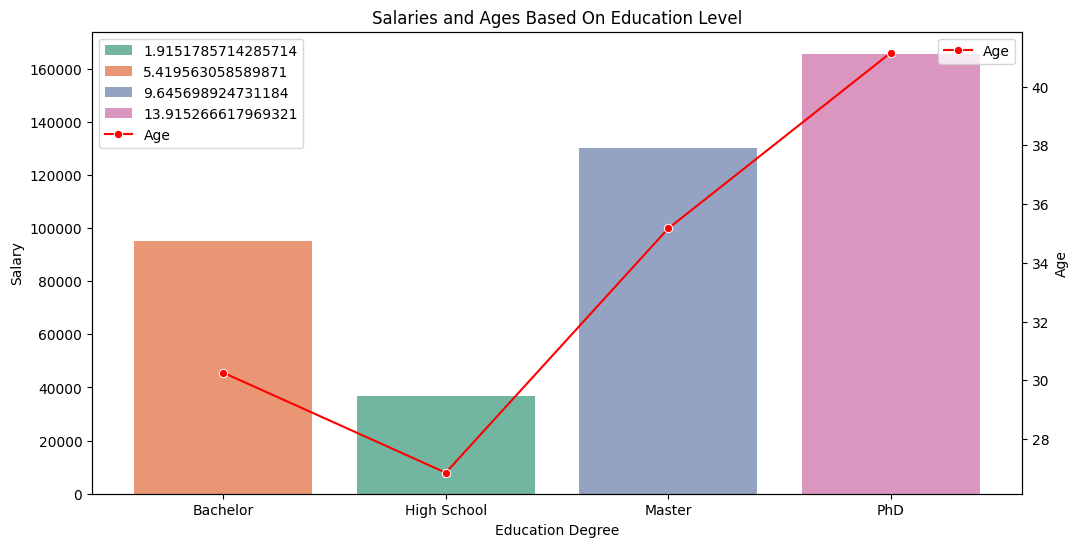

In [116]:
d2 = df.groupby("Education Level").agg({'Salary': 'mean', 'Age': 'mean', 'Years of Experience': 'mean'}).reset_index()

# Display the result
display(d2)

# Plotting
plt.figure(figsize=(12, 6))
ax = sns.barplot(y='Salary', x='Education Level', hue='Years of Experience', data=d2, palette='Set2')

# Add a secondary y-axis for the line plot
ax2 = ax.twinx()
sns.lineplot(x='Education Level', y='Age', data=d2, color='red', ax=ax2, marker='o', label='Age')

# Set labels and title
ax.set_xlabel("Education Degree")
ax.set_ylabel("Salary")
ax2.set_ylabel("Age")
plt.title("Salaries and Ages Based On Education Level")

# Show legend for both plots
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

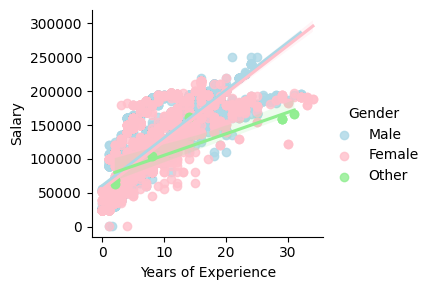

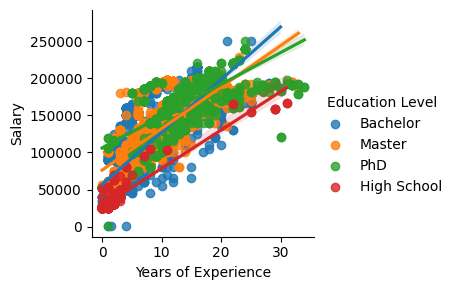

In [117]:
palett = {'Male': 'lightblue', 'Female': 'pink', 'Other': 'lightgreen'}

sns.lmplot(data=df, x='Years of Experience', y='Salary', hue='Gender', palette=palett, height=3, aspect=1.2)
sns.lmplot(data=df, x='Years of Experience', y='Salary', hue='Education Level', height=3, aspect=1.2)

## Pairplot Of `Salary`, `Age`, `Years of Experience`, `Education Level`

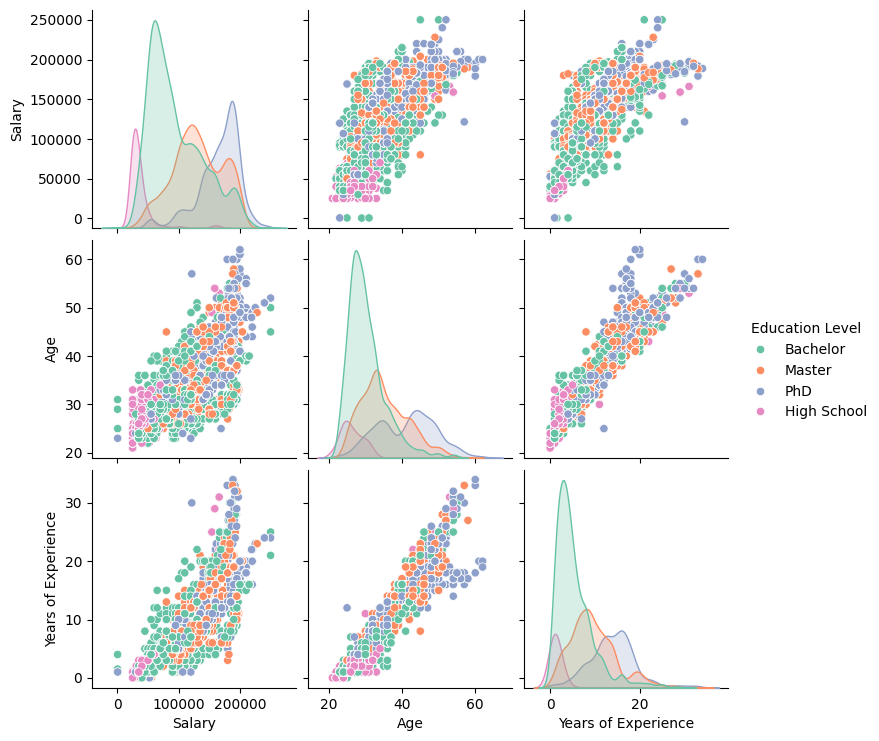

In [118]:
# Create a pairplot
sns.pairplot(df[['Salary', 'Age', 'Years of Experience', 'Education Level']], hue='Education Level', palette='Set2')
plt.show()

## Salary Based On `Gender` & `Age`

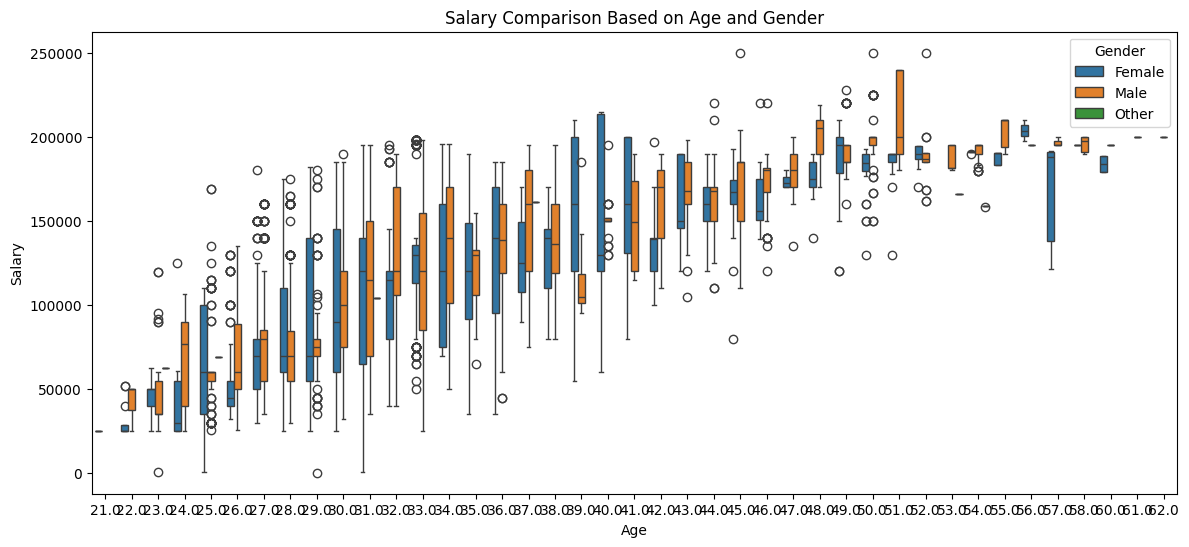

In [119]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Age', y='Salary', hue='Gender', data=df)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Salary Comparison Based on Age and Gender")
plt.legend(title='Gender')
plt.show()

In [120]:
df.groupby('Gender')[['Age', 'Salary', 'Years of Experience']].agg({'Age':['mean', 'count'],
                                                                    'Salary':'mean',
                                                                    'Years of Experience':'mean',
                                                                    })

Age               Salary Years of Experience
             mean count           mean                mean
Gender                                                    
Female  32.626286  3013  107888.998672            7.420179
Male    34.418415  3671  121395.697630            8.617407
Other   39.571429    14  125869.857143           16.428571

1- Age:

* 'Other' gender category has the highest average age (39.57 years), followed by 'Male' (34.42 years) and 'Female' (32.63 years).

2- Sample Size:

* 'Male' category has the largest sample size (3671), while 'Other' has the smallest (14).
'
3- Salary:

* 'Other' category shows slightly higher average salary ($125,870) compared to 'Female' ($107,889) and 'Male' ($121,396).

4- Experience:

* 'Other' category has the highest average years of experience (16.43 years), followed by 'Male' (8.62 years) and 'Female' (7.42 years).

5- Gender Disparity:

* There appears to be a gender disparity in average salary, with 'Male' individuals having higher average salaries.

6- Age-Experience Relationship:

* Individuals in the 'Other' category tend to have higher average age and years of experience compared to 'Female' and 'Male' categories. But important note is that there are just 14 samples with 'Other' category.

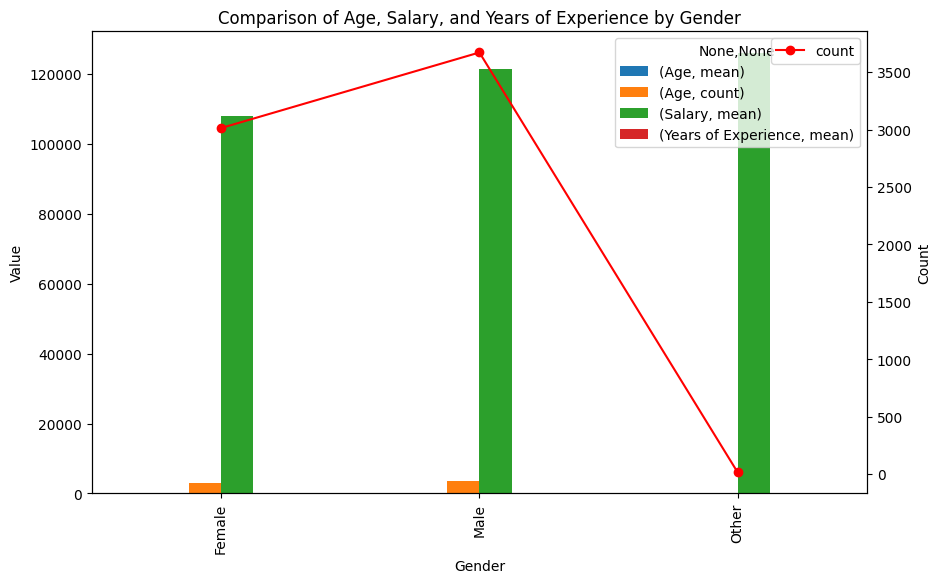

In [140]:
df3 = df.groupby('Gender')[['Age', 'Salary', 'Years of Experience']].agg({'Age':['mean', 'count'],
                                                                    'Salary':'mean',
                                                                    'Years of Experience':'mean',
                                                                    })

# Plotting
ax = df3[['Age', 'Salary', 'Years of Experience']].plot(kind='bar', figsize=(10, 6))
ax2 = ax.twinx()
df3['Age']['count'].plot(kind='line', marker='o', linestyle='-', color='r', ax=ax2)

# Set labels and title
ax.set_ylabel('Value')
ax2.set_ylabel('Count')
plt.title('Comparison of Age, Salary, and Years of Experience by Gender')
plt.legend()
# Show the plot
plt.show()